<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Single-Cell-Aggregate" data-toc-modified-id="Single-Cell-Aggregate-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single Cell Aggregate</a></span></li></ul></li><li><span><a href="#Main" data-toc-modified-id="Main-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Main</a></span></li></ul></div>

# Import

In [5]:
# !pip install phate scprep umap-learn tasklogger magic-impute louvain seaborn
# !pip install git+https://github.com/jacoblevine/phenograph.git
# !pip install jupyter_contrib_nbextensions

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
import sklearn.cluster
import sklearn.manifold

import scprep
import os
import tasklogger
import phate
import umap

import graphtools as gt
import magic
import phenograph
import louvain

from sklearn.decomposition import PCA

c:\users\stéphane\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.


# Functions

## Single Cell Aggregate

In [14]:
def sc_aggregate(metadata, cluster_param, target_param, order_by):
    """ Aggregate clusters of celltypes and extract proportion of a group
     
     
    @param metadata Target metadata dataframe
    @param cluster_param Str parameter identifying clusters
    @param target_param Str Name of the metadata feature to aggregate
    @param order_by Str name of the metadata feature to order by
    @return DataFrame with different_columns of percentages
    @return Plot of percentages
    """
    keys = metadata[target_param].value_counts().keys()
    perc_keys = [x+'_perc' for x in keys]
    df=pd.DataFrame(columns=perc_keys)
    df['tot_value'] = 0

    for c in sorted(metadata[cluster_param].unique()):
        subset = metadata[metadata[cluster_param]==c]
        subset_val=subset[target_param].value_counts().to_dict()
        tot_value = subset[target_param].value_counts().sum()

        [subset_val.setdefault(k, 0) for k in keys]
        return_values = [round(subset_val[p]/tot_value*100,2)for p in subset_val]
        
        return_values.append(tot_value)

        df.loc[c] = return_values
        
    df = df.sort_values(by=order_by+'_perc', ascending=False)
    
    axis = df[[x+'_perc' for x in keys]].plot(kind="bar", stacked=True)
#     fig = axis.get_fig ure()
    
    return df, axis

# Main

In [8]:
data = scprep.io.load_csv("../data/moein_data/moein.data.csv", cell_axis = "column")
metadata = scprep.io.load_csv("../data/moein_data/moein.meta_data.csv")

c:\users\stéphane\appdata\local\programs\python\python37\lib\site-packages\scprep\sanitize.py:53: RuntimeWarning: Data is not numeric. Many scprep functions will not work.
  RuntimeWarning,


In [9]:
data_phate = phate.PHATE().fit_transform(data)
data_phate = pd.DataFrame(data_phate, index=data.index)

Calculating PHATE...
  Running PHATE on 13592 observations and 3897 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 6.38 seconds.
    Calculating KNN search...
    Calculated KNN search in 43.43 seconds.
    Calculating affinities...
    Calculated affinities in 29.88 seconds.
  Calculated graph and diffusion operator in 80.03 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 5.22 seconds.
    Calculating KMeans...
    Calculated KMeans in 32.23 seconds.
  Calculated landmark operator in 39.38 seconds.
  Calculating optimal t...
    Automatically selected t = 6
  Calculated optimal t in 4.89 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.79 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.52 seconds.
Calculated PHATE in 132.63 seconds.


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

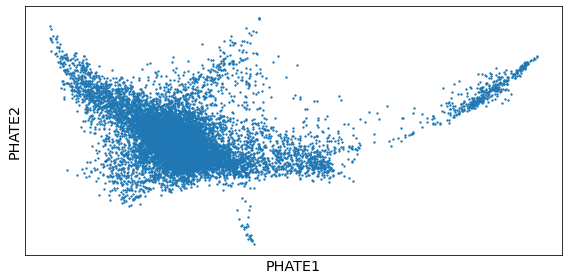

In [10]:
scprep.plot.scatter2d(data_phate, figsize=(8,4), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

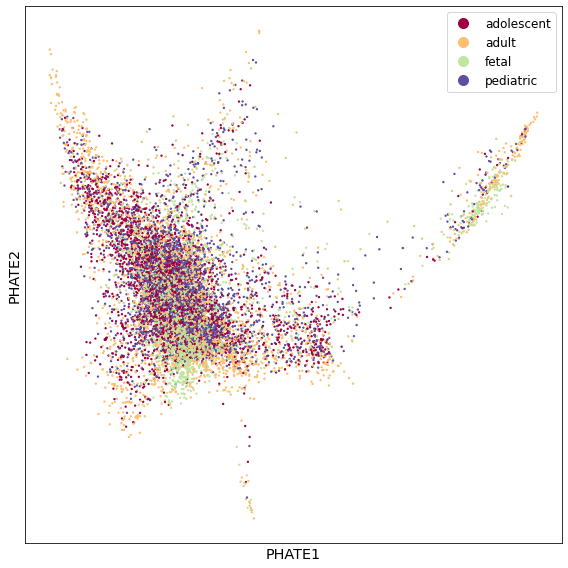

In [11]:
scprep.plot.scatter2d(data_phate, c=metadata["age"],figsize=(8,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

In [12]:
# sub_data = data[metadata['age'] != 'fetal']
# sub_metadata = metadata[metadata['age'] != 'fetal']
# sub_metadata

# proportion_cluster(data, 'seurat_clusters', 'age') => retourne dataframe de proportion 

SyntaxError: invalid syntax (<ipython-input-12-b53c63465b43>, line 5)

In [16]:
sub_data_phate = phate.PHATE().fit_transform(sub_data)

NameError: name 'sub_data' is not defined

In [ ]:
sub_data_phate = pd.DataFrame(sub_data_phate, index=sub_data.index)

In [ ]:
scprep.plot.scatter2d(sub_data_phate,c=sub_metadata["age"],figsize=(10,10), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

In [17]:
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.6,seurat_clusters,age,S.Score,G2M.Score,Phase,integrated_snn_res.0.4
TCGCGAGGTTTAGGAA_1,HP773,1034.000000,650,3.288201,3.0,5,pediatric,-0.023260,-0.018602,G1,5
ACCTTTATCGTGACAT_1,HP773,2673.000000,1391,3.179948,4.0,0,pediatric,-0.051620,0.117481,G2M,0
CGGAGCTTCCGCATCT_1,HP773,927.000000,610,1.402373,3.0,0,pediatric,-0.037142,-0.079287,G1,0
CGCTGGAGTCGTTGTA_1,HP773,1820.000000,1034,3.241758,3.0,0,pediatric,0.005744,0.011691,G2M,0
GTGTGCGAGCGGCTTC_1,HP773,617.000000,365,3.727715,2.0,6,pediatric,-0.009725,-0.019488,G1,6
...,...,...,...,...,...,...,...,...,...,...,...
CTGCCTACAAGCTGAG_12,HF588,804.302460,337,1.001472,0.0,2,fetal,0.105172,-0.052438,S,2
TCGCGAGGTTGCTCCT_12,HF588,772.912931,310,1.519034,0.0,2,fetal,-0.004290,-0.050681,G1,2
AGAGCTTTCACCCGAG_12,HF588,930.952502,446,1.893067,2.0,0,fetal,-0.032441,-0.032703,G1,0
CTCGAAAAGATCGGGT_12,HF588,882.212233,393,2.471061,1.0,2,fetal,-0.018380,0.063663,G2M,2


,pediatric_perc,adolescent_perc,fetal_perc,adult_perc,tot_value
1,37.57,28.83,25.91,7.69,2574.0
3,33.96,30.49,24.62,10.92,1584.0
5,32.16,28.87,23.92,15.05,485.0
0,32.46,30.39,20.55,16.61,5811.0
4,43.96,29.18,19.54,7.33,819.0
6,43.28,34.47,16.14,6.11,409.0
8,51.16,20.93,13.95,13.95,43.0
2,90.63,5.20,2.36,1.82,1867.0


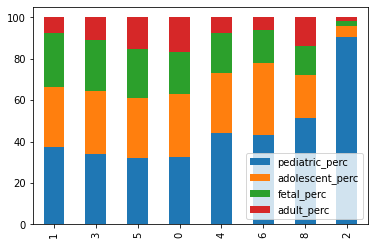

In [15]:
df, axis = sc_aggregate(metadata=metadata, 
                        cluster_param ='seurat_clusters', 
                        target_param = 'age', 
                        order_by = 'fetal')

df